In [8]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit import *
#import numpy as np
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

%matplotlib inline

ibmqfactory.load_account:WARNING:2021-05-27 06:20:00,820: Credentials are already in use. The existing account in the session will be replaced.


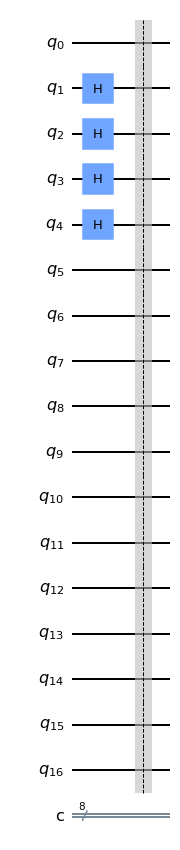

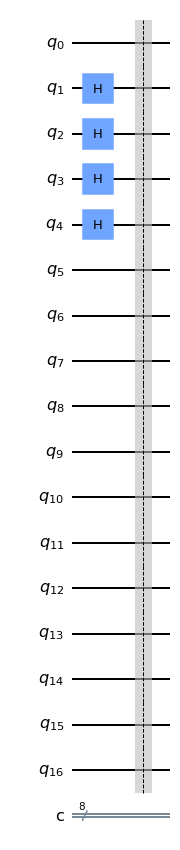

In [9]:
# Create a Quantum Circuit
n=17
circ = QuantumCircuit(n, 8)
circ.h(1)
circ.h(2)
circ.h(3)
circ.h(4)
circ.barrier(range(n))
circ.draw()

In [10]:
def newandgate(nqubits):
    #qc = QuantumCircuit(len(nqubits))
    circ.h(nqubits[2])
    circ.cx(nqubits[1], nqubits[3])
    circ.cx(nqubits[2], nqubits[0])
    circ.cx(nqubits[2], nqubits[1])
    circ.cx(nqubits[0], nqubits[3])
    circ.tdg(nqubits[0])
    circ.tdg(nqubits[1])
    circ.t(nqubits[2])
    circ.t(nqubits[3])
    circ.cx(nqubits[0], nqubits[3])
    circ.cx(nqubits[2], nqubits[1])
    circ.cx(nqubits[2], nqubits[0])
    circ.cx(nqubits[1], nqubits[3])
    circ.h(nqubits[2])
    circ.s(nqubits[2])
    #circ.barrier(range(n))
    #qc.draw()
    #U_s = qc.to_gate()
    #U_s.name = "AND4gate"
    #return U_s

In [11]:
def newandplusgate(nqubits):
    #qc = QuantumCircuit(len(nqubits))
    circ.reset(nqubits[2])

In [12]:
#1th line :
circ.barrier(range(17))
#2th line :
circ.cx(1,7)
circ.cx(7,1)
circ.cx(2,8)
circ.cx(8,2)
circ.barrier(range(17))
#3th line :
circ.cx(8,1)
circ.cx(8,5)
circ.cx(3,2)
circ.cx(4,6)
circ.barrier(range(17))
#4th line :
newandgate([1,2,9,13])
newandgate([3,4,10,14])
newandgate([5,6,11,15])
newandgate([7,8,12,16])
circ.barrier(range(17))
#5th line :
circ.cx(8,1)
circ.cx(8,5)
circ.cx(3,2)
circ.cx(4,6)
circ.barrier(range(17))
#6th line :
circ.cx(7,1)
circ.cx(1,7)
circ.cx(8,2)
circ.cx(2,8)
circ.barrier(range(17))
#7th line :
circ.cx(9,5)
circ.cx(5,9)
circ.cx(10,6)
circ.cx(6,10)
circ.cx(11,7)
circ.cx(7,11)
circ.cx(12,8)
circ.cx(8,12)
circ.barrier(range(17))
#8th line :
circ.cx(1,8)
circ.cx(2,8)
circ.cx(7,8)
circ.barrier(range(17))
#9th line :
circ.cx(1,5)
circ.cx(2,5)
circ.cx(3,5)
circ.cx(2,6)
circ.cx(3,6)
circ.cx(4,6)
circ.cx(3,7)
circ.barrier(range(17))
#10th line :
circ.cx(1,2)
circ.barrier(range(17))
#11th line :
newandgate([4,5,9,13])
newandgate([1,6,10,14])
newandgate([2,7,11,15])
newandgate([3,8,12,16])
circ.barrier(range(17))
#12th line :
circ.cx(1,2)
circ.barrier(range(17))
#13th line :
circ.cx(1,5)
circ.cx(2,5)
circ.cx(3,5)
circ.cx(2,6)
circ.cx(3,6)
circ.cx(4,6)
circ.cx(3,7)
circ.barrier(range(17))
#14th line :
circ.cx(1,8)
circ.cx(2,8)
circ.cx(7,8)
circ.barrier(range(17))
#15th line :
circ.cx(2,9)
circ.cx(3,9)
circ.cx(4,9)
circ.cx(3,10)
circ.cx(4,10)
circ.cx(4,11)
circ.cx(8,11)
circ.cx(1,12)
circ.cx(2,12)
circ.cx(3,12)
circ.cx(4,12)
circ.barrier(range(17))
#16th line :
circ.barrier(range(17))


In [13]:
circ.barrier(range(14))
# map the quantum measurement to the classical bits
#circ.measure(range(14), range(14))
circ.measure(4, 7)
circ.measure(3, 6)
circ.measure(2, 5)
circ.measure(1, 4)
circ.measure(9, 3)
circ.measure(10,2)
circ.measure(11,1)
circ.measure(12,0)
# The Qiskit circuit object supports composition using
# the addition operator.
#drawing the circuit


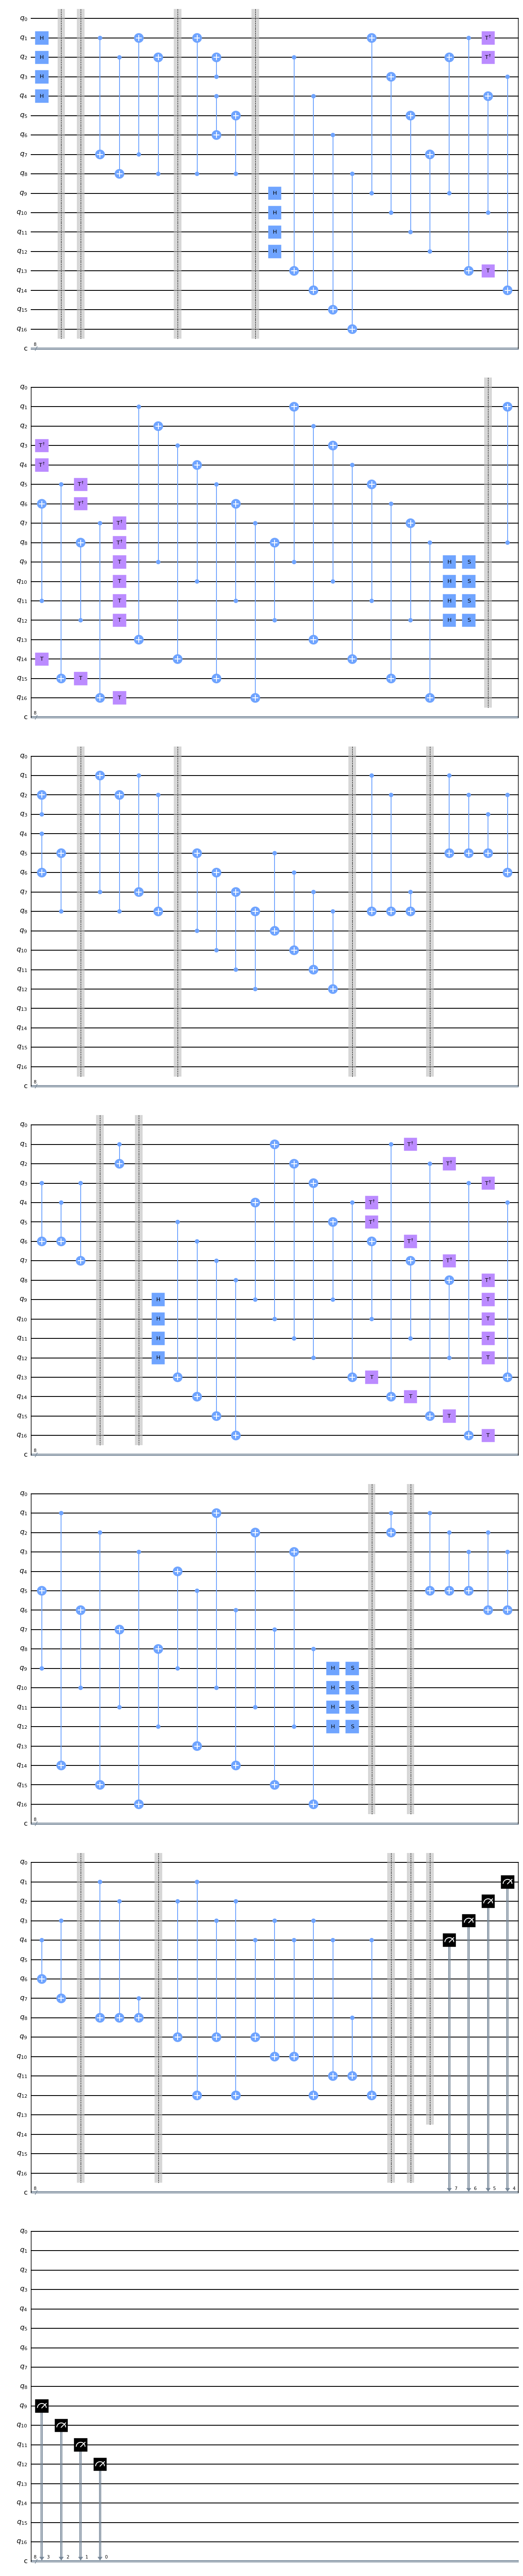

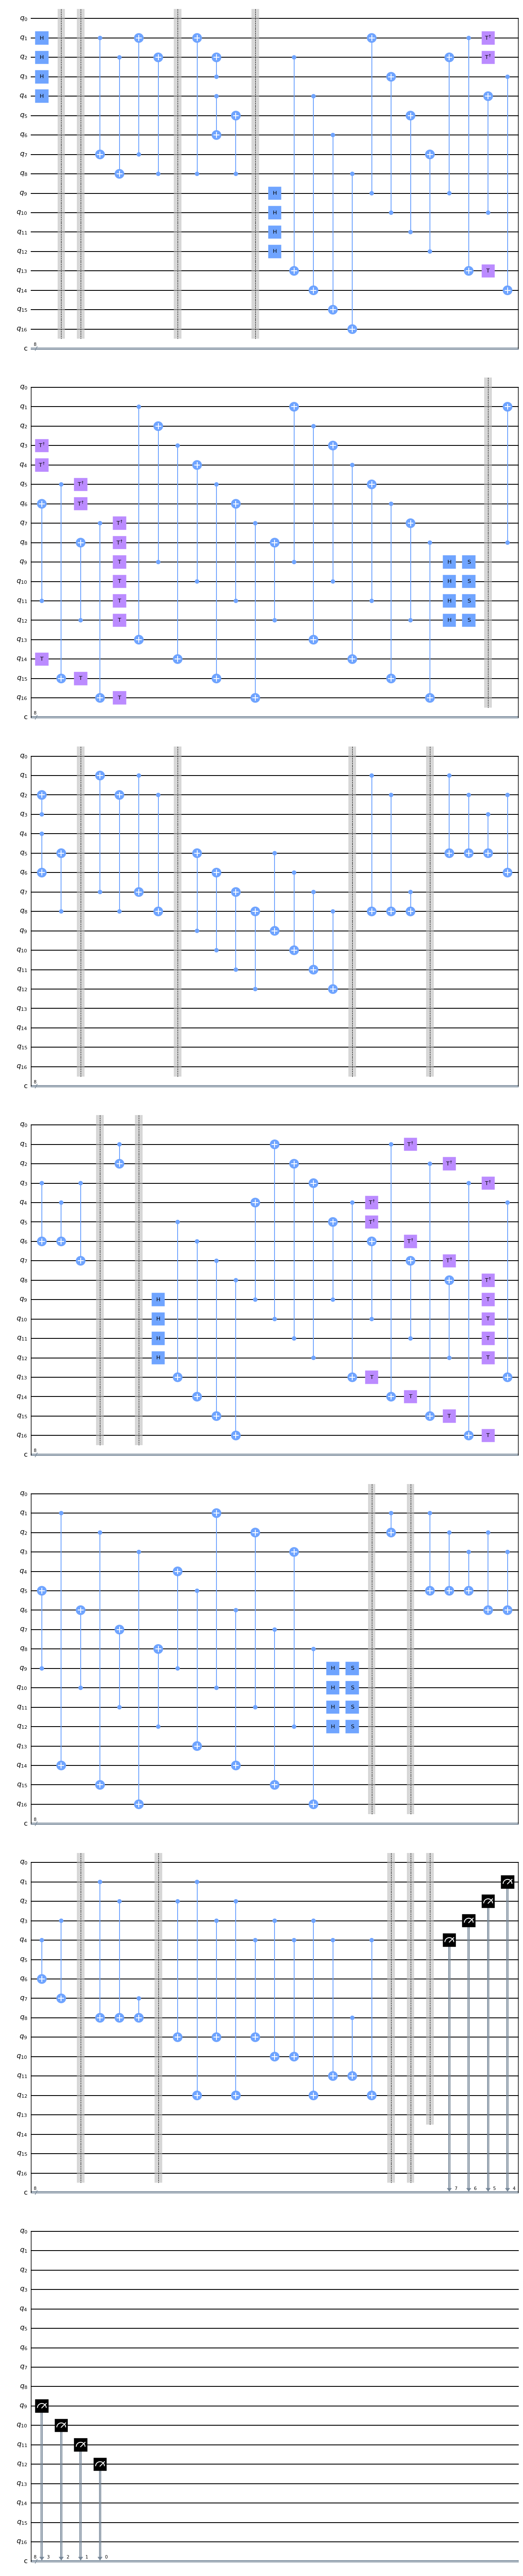

In [14]:
circ.draw()

In [15]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(circ, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)

{'11001010': 60, '00111110': 53, '11010100': 64, '10110101': 71, '01110110': 69, '11100011': 55, '10101100': 75, '10010010': 63, '11111000': 51, '00010001': 67, '00101001': 70, '01011011': 67, '10001111': 61, '01100111': 65, '01001101': 76, '00000000': 57}


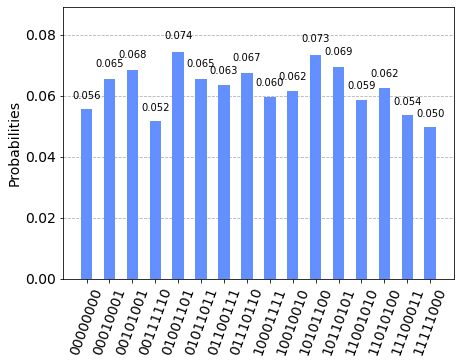

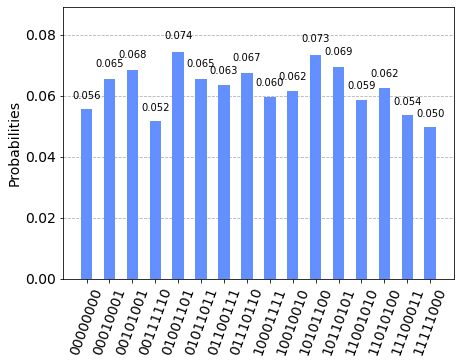

In [16]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)